<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/ksat_dataprocess_items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSAT data process (as of 0924)

In [1]:
import pandas as pd

In [81]:
url = 'https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/ksatdata_nocontraction.csv'
df1 = pd.read_csv(url)

In [82]:
df1

,Year,Category,QN,Passage
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ..."
1,2022,Context,Q19,It was Evelyn_s first time to explore the Badl...
2,2022,Context,Q20,when they first consider experimenting with so...
3,2022,Context,Q22,"Environmental hazards include biological, phys..."
4,2022,Context,Q23,Scientists use paradigms rather than believing...
...,...,...,...,...
131,2015,Infer-Logic,Q35,A currently popular attitude is to blame techn...
132,2015,Infer-Logic,Q36,The impact of color has been studied for decad...
133,2015,Infer-Logic,Q37,Food plays a large part in how much you enjoy ...
134,2015,Infer-Logic,Q38,Exactly how cicadas keep track of time has alw...


Adding a colum with length info

In [83]:
df2 = df1

In [85]:
# Added column: String length
length = []

for i in range(0, len(df2['Passage'])):
  LEN = len(df2['Passage'][i])
  length.append(LEN)

df2['String'] = length

In [86]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Passage'])):
  TSP = df2['Passage'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)

df2['Splits'] = tsplit
df2['N_Splits'] = splen

## Lexical Diversity Index

In [31]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 4.0 MB/s 


In [87]:
# Added column: String length
lem = []

for i in range(0, len(df2['Passage'])):
  LEM = ld.flemmatize(df2['Passage'][i])
  lem.append(LEM)

df2['Lemma'] = lem

In [88]:
df2

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william..."
1,2022,Context,Q19,It was Evelyn_s first time to explore the Badl...,696,"[It, was, Evelyn_s, first, time, to, explore, ...",118,"[it, be, evelyns, first, time, to, explore, th..."
2,2022,Context,Q20,when they first consider experimenting with so...,908,"[when, they, first, consider, experimenting, w...",155,"[when, they, first, consider, experiment, with..."
3,2022,Context,Q22,"Environmental hazards include biological, phys...",1002,"[Environmental, hazards, include, biological,,...",149,"[environmental, hazard, include, biological, p..."
4,2022,Context,Q23,Scientists use paradigms rather than believing...,1002,"[Scientists, use, paradigms, rather, than, bel...",157,"[scientist, use, paradigm, rather, than, belie..."
...,...,...,...,...,...,...,...,...
131,2015,Infer-Logic,Q35,A currently popular attitude is to blame techn...,837,"[A, currently, popular, attitude, is, to, blam...",132,"[a, currently, popular, attitude, be, to, blam..."
132,2015,Infer-Logic,Q36,The impact of color has been studied for decad...,930,"[The, impact, of, color, has, been, studied, f...",156,"[the, impact, of, color, have, be, study, for,..."
133,2015,Infer-Logic,Q37,Food plays a large part in how much you enjoy ...,709,"[Food, plays, a, large, part, in, how, much, y...",126,"[food, play, a, large, part, in, how, much, yo..."
134,2015,Infer-Logic,Q38,Exactly how cicadas keep track of time has alw...,949,"[Exactly, how, cicadas, keep, track, of, time,...",164,"[exactly, how, cicada, keep, track, of, time, ..."


In [89]:
# ADD LD indices

TTR = []
RTTR = []
LogTTR = []
MSTTR = []
FDTTR = []
MATTR = []
HDD = []
MTLD = []
BILOG = []
MA = []


for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  msttr = ld.maas_ttr(flt)
  fdttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  bilog = ld.mtld_ma_wrap(flt)
  ma = ld.mtld_ma_bid(flt)

  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MSTTR.append(msttr)
  FDTTR.append(fdttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  BILOG.append(bilog)
  MA.append(ma)

df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MSTTR'] = MSTTR
df2['FDTTR'] = FDTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['BILOG'] = BILOG
df2['MA'] = MA

In [90]:
df2

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william...",0.600000,6.292853,0.891325,0.053236,0.790000,0.763279,0.782583,71.694409,63.127273,57.933236
1,2022,Context,Q19,It was Evelyn_s first time to explore the Badl...,696,"[It, was, Evelyn_s, first, time, to, explore, ...",118,"[it, be, evelyns, first, time, to, explore, th...",0.694915,7.548712,0.923708,0.036823,0.810000,0.803188,0.830260,96.735356,93.008475,87.868421
2,2022,Context,Q20,when they first consider experimenting with so...,908,"[when, they, first, consider, experimenting, w...",155,"[when, they, first, consider, experiment, with...",0.541935,6.747042,0.878533,0.055456,0.733333,0.714340,0.758341,53.653846,52.612903,47.936014
3,2022,Context,Q22,"Environmental hazards include biological, phys...",1002,"[Environmental, hazards, include, biological,,...",149,"[environmental, hazard, include, biological, p...",0.604027,7.373087,0.899252,0.046359,0.810000,0.799600,0.830070,78.528149,81.899329,69.375772
4,2022,Context,Q23,Scientists use paradigms rather than believing...,1002,"[Scientists, use, paradigms, rather, than, bel...",157,"[scientist, use, paradigm, rather, than, belie...",0.592357,7.422208,0.896436,0.047163,0.780000,0.770185,0.813490,63.181845,60.222930,51.878905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2015,Infer-Logic,Q35,A currently popular attitude is to blame techn...,837,"[A, currently, popular, attitude, is, to, blam...",132,"[a, currently, popular, attitude, be, to, blam...",0.674242,7.746456,0.919275,0.038068,0.790000,0.787229,0.826796,70.933684,79.848485,57.868590
132,2015,Infer-Logic,Q36,The impact of color has been studied for decad...,930,"[The, impact, of, color, has, been, studied, f...",156,"[the, impact, of, color, have, be, study, for,...",0.500000,6.244998,0.862739,0.062587,0.680000,0.682991,0.723288,43.949490,41.826923,41.234960
133,2015,Infer-Logic,Q37,Food plays a large part in how much you enjoy ...,709,"[Food, plays, a, large, part, in, how, much, y...",126,"[food, play, a, large, part, in, how, much, yo...",0.698413,7.839663,0.925781,0.035336,0.820000,0.807792,0.856121,83.004745,96.746032,71.823770
134,2015,Infer-Logic,Q38,Exactly how cicadas keep track of time has alw...,949,"[Exactly, how, cicadas, keep, track, of, time,...",164,"[exactly, how, cicada, keep, track, of, time, ...",0.573171,7.340167,0.890865,0.049274,0.753333,0.772696,0.809109,70.245680,60.317073,66.386131


In [91]:
df2.describe()

,Year,String,N_Splits,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2018.500000,959.161765,157.441176,0.600375,7.464290,0.898066,0.046496,0.770784,0.769992,0.801787,69.936235,70.371938,63.227408
std,2.299758,201.687665,30.560629,0.059500,0.692086,0.018380,0.007911,0.048507,0.045108,0.038743,19.356104,19.880445,18.526702
min,2015.000000,575.000000,105.000000,0.451282,5.376082,0.843935,0.032568,0.630000,0.581905,0.686500,33.165609,32.157895,0.000000
25%,2016.750000,831.500000,139.750000,0.561111,7.022525,0.887274,0.040092,0.745000,0.749979,0.780868,56.232643,57.424318,52.435550
50%,2018.500000,959.500000,156.500000,0.600000,7.441873,0.898149,0.046585,0.773333,0.775913,0.806953,68.431332,68.052541,62.218431
75%,2020.250000,1051.250000,169.000000,0.646190,7.936625,0.913734,0.051133,0.800000,0.799780,0.830078,82.787943,83.409023,74.180207
max,2022.000000,1608.000000,260.000000,0.728972,9.071147,0.932349,0.073482,0.890000,0.866111,0.880651,128.591868,122.560510,110.240000


Plotting

In [92]:
from matplotlib import pyplot as plt

In [101]:
ordered_ttr = list(df2['TTR']).sort()
ordered_ttr

In [ ]:
a1 = df2[['N_Splits','TTR']]
a2 = a1.sort_values(by=['N_Splits'])
a2

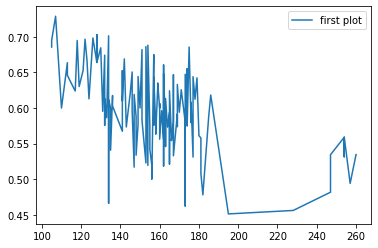

In [113]:
plt.plot(a2['N_Splits'],a2['TTR'],  label='first plot')
# plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16], label='second plot')
plt.legend()

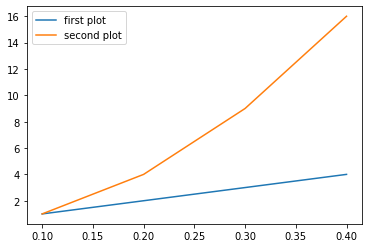

In [94]:
plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4], label='first plot')
plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16], label='second plot')
plt.legend()

In [124]:
df = df2[['N_Splits','TTR','HDD','MTLD','MA']]
df

,N_Splits,TTR,HDD,MTLD,MA
0,110,0.600000,0.782583,71.694409,57.933236
1,118,0.694915,0.830260,96.735356,87.868421
2,155,0.541935,0.758341,53.653846,47.936014
3,149,0.604027,0.830070,78.528149,69.375772
4,157,0.592357,0.813490,63.181845,51.878905
...,...,...,...,...,...
131,132,0.674242,0.826796,70.933684,57.868590
132,156,0.500000,0.723288,43.949490,41.234960
133,126,0.698413,0.856121,83.004745,71.823770
134,164,0.573171,0.809109,70.245680,66.386131


In [125]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [120]:
df2

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william...",0.600000,6.292853,0.891325,0.053236,0.790000,0.763279,0.782583,71.694409,63.127273,57.933236
1,2022,Context,Q19,It was Evelyn_s first time to explore the Badl...,696,"[It, was, Evelyn_s, first, time, to, explore, ...",118,"[it, be, evelyns, first, time, to, explore, th...",0.694915,7.548712,0.923708,0.036823,0.810000,0.803188,0.830260,96.735356,93.008475,87.868421
2,2022,Context,Q20,when they first consider experimenting with so...,908,"[when, they, first, consider, experimenting, w...",155,"[when, they, first, consider, experiment, with...",0.541935,6.747042,0.878533,0.055456,0.733333,0.714340,0.758341,53.653846,52.612903,47.936014
3,2022,Context,Q22,"Environmental hazards include biological, phys...",1002,"[Environmental, hazards, include, biological,,...",149,"[environmental, hazard, include, biological, p...",0.604027,7.373087,0.899252,0.046359,0.810000,0.799600,0.830070,78.528149,81.899329,69.375772
4,2022,Context,Q23,Scientists use paradigms rather than believing...,1002,"[Scientists, use, paradigms, rather, than, bel...",157,"[scientist, use, paradigm, rather, than, belie...",0.592357,7.422208,0.896436,0.047163,0.780000,0.770185,0.813490,63.181845,60.222930,51.878905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2015,Infer-Logic,Q35,A currently popular attitude is to blame techn...,837,"[A, currently, popular, attitude, is, to, blam...",132,"[a, currently, popular, attitude, be, to, blam...",0.674242,7.746456,0.919275,0.038068,0.790000,0.787229,0.826796,70.933684,79.848485,57.868590
132,2015,Infer-Logic,Q36,The impact of color has been studied for decad...,930,"[The, impact, of, color, has, been, studied, f...",156,"[the, impact, of, color, have, be, study, for,...",0.500000,6.244998,0.862739,0.062587,0.680000,0.682991,0.723288,43.949490,41.826923,41.234960
133,2015,Infer-Logic,Q37,Food plays a large part in how much you enjoy ...,709,"[Food, plays, a, large, part, in, how, much, y...",126,"[food, play, a, large, part, in, how, much, yo...",0.698413,7.839663,0.925781,0.035336,0.820000,0.807792,0.856121,83.004745,96.746032,71.823770
134,2015,Infer-Logic,Q38,Exactly how cicadas keep track of time has alw...,949,"[Exactly, how, cicadas, keep, track, of, time,...",164,"[exactly, how, cicada, keep, track, of, time, ...",0.573171,7.340167,0.890865,0.049274,0.753333,0.772696,0.809109,70.245680,60.317073,66.386131


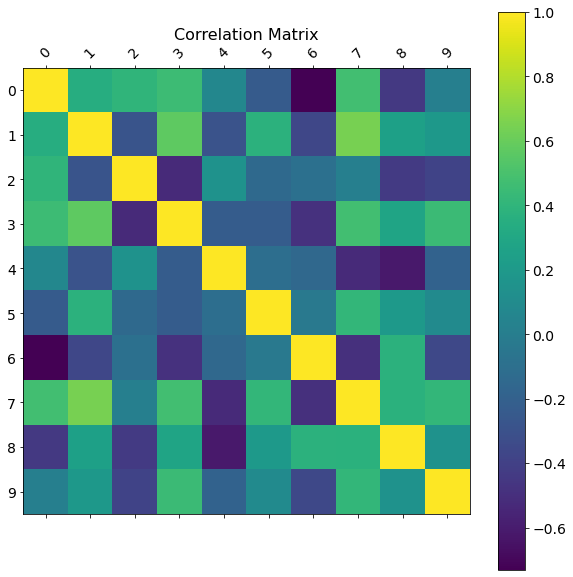

In [127]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);